I create a face recognition/verification model that can be trained on the faces of multiple people.
This model can then be used to predict which of the saved identities a new image belongs to.


Dlib and OpenCV are used to extract and align the face from images.

A CNN model is created which can extract special embedding features from the face

Images of N number of people are used to train the CNN model. For each person, multiple training images are used.

A second machine learning model is trained with the embedding obtained from the CNN model for each image. The features of the data are the extracted embeddings while the label is the person's name or index.

With these, the identity of the face in new images can be determined by extracting the embedding from each image, and predicting the label using the second machine learning model.

SideNote: You should also know that faces having embeddings with small euclidean distance from eachother are more likely to be the same person than those having larger euclidean distance

In [4]:
import dlib 
import cv2 
import matplotlib.pyplot as plt
import numpy as np
import mediapipe
from model import *
from image_preprocessing import *

(96, 96, 3)

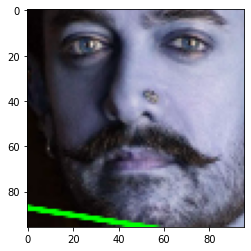

In [8]:
#the imported process function extracts and aligns the face 

#Testing a sample image
img = cv2.imread('.\\aamir_khan.PNG')
thumbnail=process(img)

In [7]:
#creates a new model for extracting special embedding features in the thumbnail
#open source saved weights from open_face is used
model = create_model()
model.load_weights('C:\\Users\\OIBRA\\Downloads\\open_face.h5')

### Processing the image of all actors and extracting the embeddings to form a DataFrame

In [8]:
#We have a folder containing a subfolder for each of 4 Nigerian actors.
#Each subfolder contains 25 random images of the actor
import os
actors=os.listdir('.\\data')
actors

['adedimeji', 'femi', 'funke', 'odunlade']

In [14]:
#we preprocess the image of all actors by cropping and aligning the face using 'process'

#This is done for all images of all actors and put into a single dataframe 
embedded_row1 = pd.DataFrame()
for actor in actors:
    picture=os.listdir(f'.\\data\\{actor}')

    for photo in picture:
        print(photo,actor)
        embedded1 = process(f'.\\data\\{actor}\\{photo}')
        embed = (embed / 255.).astype(np.float32)
        
        #We then predict the face embeddings
        embedded = model.predict(np.expand_dims(embed,axis=0))
        embedded = list(embedded[0])
        
        # The label is appended to the embedding and inserted into the big dataframe 'embedded_row'
        label = [actors.index(actor)]
        embedded_label= embedded + label
        embedded_row1 = embedded_row1.append([embedded_label])
    

1.PNG adedimeji
number of faces detected:  1
10.PNG adedimeji
number of faces detected:  1
11.PNG adedimeji
number of faces detected:  1
12.PNG adedimeji
number of faces detected:  1
13.PNG adedimeji
number of faces detected:  1
14.PNG adedimeji
number of faces detected:  1
15.PNG adedimeji
number of faces detected:  1
16.PNG adedimeji
number of faces detected:  1
17.PNG adedimeji
number of faces detected:  1
18.PNG adedimeji
number of faces detected:  1
19.PNG adedimeji
number of faces detected:  1
2.PNG adedimeji
number of faces detected:  1
20.PNG adedimeji
number of faces detected:  1
21.PNG adedimeji
number of faces detected:  1
22.PNG adedimeji
number of faces detected:  1
23.PNG adedimeji
number of faces detected:  1
24.PNG adedimeji
number of faces detected:  1
25.PNG adedimeji
number of faces detected:  1
3.PNG adedimeji
number of faces detected:  1
4.PNG adedimeji
number of faces detected:  1
5.PNG adedimeji
number of faces detected:  1
6.PNG adedimeji
number of faces detecte

In [15]:
#the first to 127th columns represent the embedding of each picture
#and the 128th column represent the actor
embedded_row1

,0,1,2,3,4,5,6,7,8,9,...,119,120,121,122,123,124,125,126,127,128
0,0.023395,-0.010484,0.213047,0.192580,0.059300,0.009429,-0.006782,-0.145550,0.175251,-0.089711,...,0.061940,0.044346,0.154232,-0.050425,-0.043470,0.129036,0.112684,0.045758,-0.089219,0
0,-0.000853,0.000563,0.254214,0.166702,0.061616,-0.020084,-0.018533,-0.122743,0.134591,-0.132924,...,0.008407,-0.005797,0.165471,-0.022442,-0.093300,0.079404,0.151576,0.034301,-0.123650,0
0,0.047970,0.032422,0.199554,0.157751,0.011932,0.088452,-0.039857,-0.177980,0.119648,-0.127090,...,0.004958,0.024679,0.072232,-0.006175,-0.119295,0.116103,0.149578,0.013523,-0.091416,0
0,0.060955,0.049114,0.124410,0.169633,0.026087,0.094964,-0.032544,-0.171292,0.119321,-0.137319,...,0.001240,-0.005744,0.073215,-0.021976,-0.104049,0.122639,0.157909,-0.010299,-0.097476,0
0,-0.011460,-0.001248,0.183275,0.180521,0.010505,0.016721,-0.068164,-0.203271,0.153946,-0.124319,...,0.037040,0.042727,0.093317,-0.064622,-0.081596,0.103326,0.166173,0.006441,-0.098833,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,0.018884,0.079053,0.137637,0.061690,0.085740,0.079737,-0.110748,-0.241558,0.049119,-0.196660,...,0.070574,0.079435,0.005508,-0.036755,-0.111479,0.005669,0.126930,0.068900,-0.092129,3
0,0.007319,0.050214,0.238541,0.133169,0.053063,0.002489,0.001981,-0.206618,0.154165,-0.184411,...,0.027814,0.008018,0.126343,-0.095018,-0.094116,0.062153,0.131412,0.003434,-0.112206,3
0,0.011379,0.055200,0.232331,0.101719,0.041800,0.032230,-0.009033,-0.178652,0.113941,-0.189017,...,0.064793,0.035017,0.063604,-0.135034,-0.093297,0.065842,0.084498,0.021875,-0.093548,3
0,0.018656,0.072897,0.274868,0.121047,0.063871,-0.005341,0.028428,-0.159675,0.050860,-0.156090,...,0.003787,0.018650,0.079266,-0.061707,-0.103266,0.093746,0.121158,0.072695,-0.154349,3


In [16]:
# we divide the dataframe into features and label
new=embedded_row1[:]
data=embedded_row1.drop(128, axis=1)
label=embedded_row1[128]


### Building the second Machine Learning model

In [17]:
# We build a Machine learning model which is trained on the features and labels
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
# we normalize the data
scaler=StandardScaler()
scaler.fit(data)
scaled_data=pd.DataFrame(scaler.transform(data))

#we split the data into training and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, label, test_size=0.10, random_state=697)
X_train1, X_test1, y_train1, y_test1 = train_test_split(scaled_data, label, test_size=0.15, random_state=2)
accuracy=[]

#we run the Kneighbours classifier model for varying number of neighbours
for i in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred=knn.predict(X_test)
    accuracy.append(np.mean(pred==y_test))
plt.figure()
plt.plot(range(1,40),accuracy, marker='o', markerfacecolor='red', markersize=9)
plt.xlabel('N')
plt.ylabel('accuracy')

knn=KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
pred=knn.predict(X_test)
print(confusion_matrix( y_test,pred))
print(classification_report( y_test,pred))

Text(0, 0.5, 'accuracy')

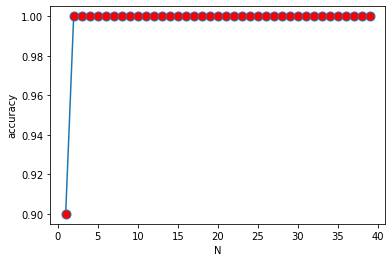

In [24]:
plt.figure()
plt.plot(range(1,40),accuracy, marker='o', markerfacecolor='red', markersize=9)
plt.xlabel('N')
plt.ylabel('accuracy')

In [25]:
#The accuracy obtained is a perfect 1. 
#THis is most likely because the faces in the images are very distinct and the amount of testing data used in small
knn=KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
pred=knn.predict(X_test)
print(confusion_matrix( y_test,pred))
print(classification_report( y_test,pred))

[[5 0 0]
 [0 2 0]
 [0 0 3]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         3

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



### Predicting the identity of new images from the images in the repository

In [26]:
#THis is a compound code which ..
#1. processes the images to obtain its embeddings
#2. uses the trained KNN model to predict the label of the embedding

result=knn.predict(process('.random\\testpicface10.PNG'))
print(f'Prediction is {actors[result[0]]}')

number of faces detected:  1
Prediction is odunlade
